In [24]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib

In [25]:
TO_SHOW = 20 #how many words will be shown on the bar graph

In [26]:
df = pd.read_csv('words.csv')
words = list(df['word'])[:TO_SHOW]
wanted_columns = [item for item in df.columns.values if item not in ['word', 'definition']]

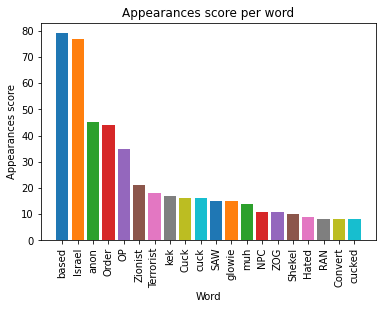

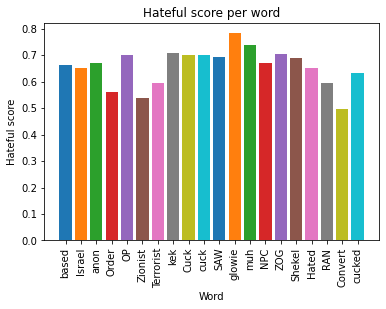

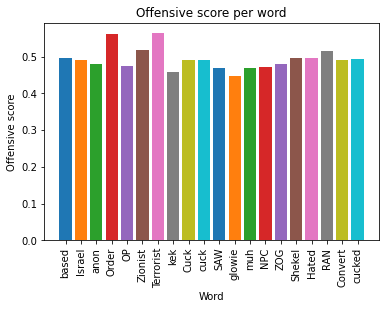

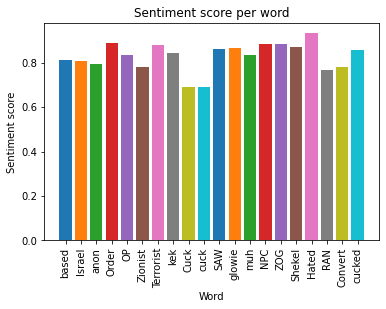

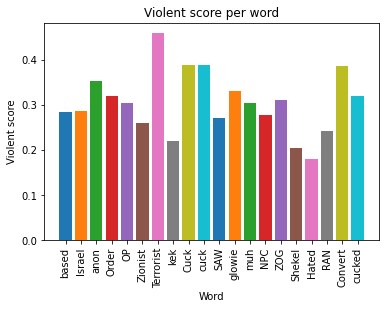

In [27]:
for wanted_column in wanted_columns:
    plt.figure()
    title = wanted_column.title()
    for i, word in enumerate(words):
        plt.bar(word, df.loc[i, wanted_column].item())
    plt.xlabel('Word')
    plt.ylabel(f'{title} score')
    plt.title(f'{title} score per word') 
    ax = plt.gca()
    ax.xaxis.set_major_locator(matplotlib.ticker.FixedLocator(range(len(words))))
    ax.set_xticklabels(labels=words,rotation=90)
    plt.show()

In [28]:
df = pd.read_csv('..\\data.csv')
df['date'] = pd.to_datetime(df['date'])
score_columns = [item for item in wanted_columns if item != 'appearances']

In [29]:
time = list(df['date'])
time.reverse()

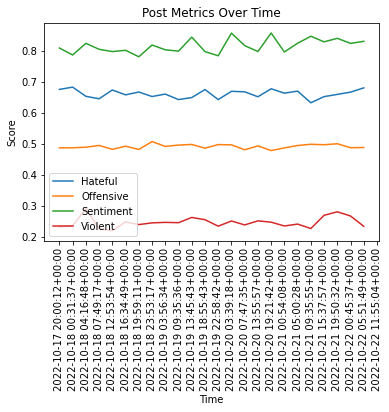

In [30]:
plt.figure()
for wanted_column in score_columns:
    temp_df = df.groupby(df['date'].dt.hour).mean()
    plt.plot(temp_df[wanted_column], label=wanted_column.title())
    plt.ylabel('Score')
    plt.xlabel('Time')
    plt.title('Post Metrics Over Time')
ax = plt.gca()
ax.xaxis.set_major_locator(matplotlib.ticker.FixedLocator(range(len(time[::100]))))
ax.set_xticklabels(labels=time[::100], rotation=90)
plt.legend()
plt.show()